In [1]:
!pip install bayesian-optimization

In [2]:
!pip install optuna


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.8 MB/s eta 0:00:00


In [3]:


import numpy as np #Operaciones matemáticas rápidas sobre matrices
import pandas as pd #biblioteca de análisis y manipulación de datos para Python
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns #permite generar fácilmente gráficos
import statsmodels.api as sm

# Preprocesado y modelado
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score

In [4]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

Mounted at /content/drive


In [5]:
# Especifica la ruta al archivo en Google Drive
file_path = '/content/drive/My Drive/DATASET_BALANCEADO_LIST.csv'
df = pd.read_csv(file_path)
df

,DIA,HORA_INFRACCION,ARMA,EDAD,LUGAR,SEXO,ANTECEDENTES,AREA_DEL_HECHO,DISTRITO,PRESUNTA_MOTIVACION
0,3,0,1,1,1,1,1,1,2,1
1,3,2,2,2,1,1,1,1,1,2
2,2,0,2,2,2,1,1,1,1,2
3,4,2,1,3,1,1,1,1,3,1
4,3,5,1,2,1,1,1,1,1,2
...,...,...,...,...,...,...,...,...,...,...
11763,4,2,5,4,2,2,2,2,3,6
11764,4,2,5,4,2,2,2,2,3,6
11765,4,2,5,4,2,2,2,2,3,6
11766,4,2,5,4,2,2,2,2,3,6


In [6]:


#verifico datos nulos
df.isnull().sum()

,0
DIA,0
HORA_INFRACCION,0
ARMA,0
EDAD,0
LUGAR,0
SEXO,0
ANTECEDENTES,0
AREA_DEL_HECHO,0
DISTRITO,0
PRESUNTA_MOTIVACION,0


In [7]:

ds=pd.DataFrame(df)
#Presenta el numero de filas
print("El número de filas(observaciones) es: ",ds.shape[0])

#Presenta el numero de columnas
print("El número de columnas(variables) es: ",len(ds.columns))

El número de filas(observaciones) es:  11768
El número de columnas(variables) es:  10


In [8]:

# tipos de la variables
ds.dtypes

,0
DIA,int64
HORA_INFRACCION,int64
ARMA,int64
EDAD,int64
LUGAR,int64
SEXO,int64
ANTECEDENTES,int64
AREA_DEL_HECHO,int64
DISTRITO,int64
PRESUNTA_MOTIVACION,int64


In [9]:
print(df['PRESUNTA_MOTIVACION'].unique())# datos en texto

[1 2 3 4 5 6]


In [10]:
print(df['DISTRITO'].unique())# datos en texto

[2 1 3]


In [11]:
print(df['ANTECEDENTES'].unique())# datos en texto

[1 2]


In [12]:
print(df['AREA_DEL_HECHO'].unique())# datos en texto

[1 2]


In [13]:
print(df['LUGAR'].unique())# datos en texto

[1 2]


In [14]:
print(df['DIA'].unique())# datos en texto

[3 2 4 1]


In [15]:
df['DIA'].value_counts()

,count
DIA,
1,3941
2,2717
3,2700
4,2410


In [16]:
print(df['EDAD'].unique())# datos en texto

[1 2 3 4]


In [17]:
print(df['HORA_INFRACCION'].unique())# datos en texto

[0 2 5 1]


In [18]:
print(df['ARMA'].unique())# datos en texto

[1 2 3 4 5]


In [19]:
print(df['SEXO'].unique())# datos en texto

[1 2]


In [20]:
df.head()

,DIA,HORA_INFRACCION,ARMA,EDAD,LUGAR,SEXO,ANTECEDENTES,AREA_DEL_HECHO,DISTRITO,PRESUNTA_MOTIVACION
0,3,0,1,1,1,1,1,1,2,1
1,3,2,2,2,1,1,1,1,1,2
2,2,0,2,2,2,1,1,1,1,2
3,4,2,1,3,1,1,1,1,3,1
4,3,5,1,2,1,1,1,1,1,2


In [21]:
df.sample(10)

,DIA,HORA_INFRACCION,ARMA,EDAD,LUGAR,SEXO,ANTECEDENTES,AREA_DEL_HECHO,DISTRITO,PRESUNTA_MOTIVACION
1545,3,2,1,2,2,1,1,1,2,2
8284,1,0,2,1,2,2,2,2,2,3
5990,3,1,1,2,1,1,1,1,1,2
1377,4,5,1,2,2,1,1,1,1,2
8498,1,0,3,1,2,2,2,2,2,3
4279,2,0,1,2,1,1,1,1,2,2
9311,3,1,3,3,2,2,2,2,3,4
4997,3,1,1,2,2,1,1,1,1,2
713,2,2,4,2,1,1,1,1,3,1
8620,2,0,3,1,2,2,2,2,2,3


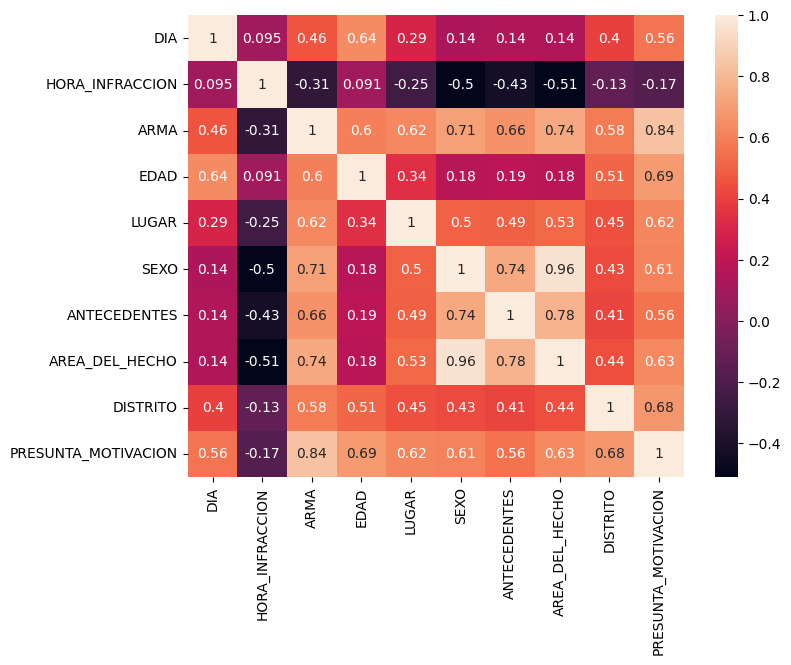

In [22]:

#corelacion
corr_df = df.corr(method='pearson')

plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True)
plt.show()

In [23]:

X = df.iloc[:, [3,7,9,0,8,5,4,6,1]] # atributos de entrada seran las primeras columnas
Y = df.iloc[:,[2]] # atributos de destino

#presentacion de los atributos de entrada
X.head()

,EDAD,AREA_DEL_HECHO,PRESUNTA_MOTIVACION,DIA,DISTRITO,SEXO,LUGAR,ANTECEDENTES,HORA_INFRACCION
0,1,1,1,3,2,1,1,1,0
1,2,1,2,3,1,1,1,1,2
2,2,1,2,2,1,1,2,1,0
3,3,1,1,4,3,1,1,1,2
4,2,1,2,3,1,1,1,1,5


In [24]:

#presentacion de los atributos de destino
Y.head()

,ARMA
0,1
1,2
2,2
3,1
4,1


In [25]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=7)

print('Son {} datos para entrenamiento y {} datos para prueba'.format(X_train.shape[0], X_test.shape[0]))

Son 9414 datos para entrenamiento y 2354 datos para prueba


In [26]:


X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9414 entries, 80 to 9412
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   EDAD                 9414 non-null   int64
 1   AREA_DEL_HECHO       9414 non-null   int64
 2   PRESUNTA_MOTIVACION  9414 non-null   int64
 3   DIA                  9414 non-null   int64
 4   DISTRITO             9414 non-null   int64
 5   SEXO                 9414 non-null   int64
 6   LUGAR                9414 non-null   int64
 7   ANTECEDENTES         9414 non-null   int64
 8   HORA_INFRACCION      9414 non-null   int64
dtypes: int64(9)
memory usage: 735.5 KB


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score
from bayes_opt import BayesianOptimization

def evaluate_model(criterion, max_depth, min_samples_split, min_samples_leaf):
    # Opciones para el criterio
    criterion_options = ['gini', 'entropy']
    criterion = criterion_options[int(round(criterion))]

    # Crear y entrenar el modelo
    model = DecisionTreeClassifier(
        criterion=criterion,
        max_depth=int(round(max_depth)),
        min_samples_split=int(round(min_samples_split)),
        min_samples_leaf=int(round(min_samples_leaf)),
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Retornar la métrica objetivo (precisión)
    return precision_score(y_test, y_pred, average='micro')

# Definir el espacio de búsqueda
pbounds = {
    'criterion': (0, 1),              # 0 = 'gini', 1 = 'entropy'
    'max_depth': (3, 10),
    'min_samples_split': (2, 11),
    'min_samples_leaf': (1, 25)
}

# Configurar y ejecutar la optimización bayesiana
optimizer = BayesianOptimization(
    f=evaluate_model,
    pbounds=pbounds,
)

# Ejecutar la optimización
optimizer.maximize(init_points=10, n_iter=90)

# Obtener los mejores parámetros encontrados
best_params = optimizer.max['params']

# Convertir el índice del criterio a su nombre
best_criterion_index = int(round(best_params['criterion']))
best_criterion = ['gini', 'entropy'][best_criterion_index]

# Obtener la precisión encontrada
best_precision = optimizer.max['target']

# Imprimir los resultados
print("Mejores hiperparámetros encontrados:")
print(f"Criterion: {best_criterion}")
print(f"Max Depth: {int(round(best_params['max_depth']))}")
print(f"Min Samples Split: {int(round(best_params['min_samples_split']))}")
print(f"Min Samples Leaf: {int(round(best_params['min_samples_leaf']))}")
print(f"Precisión alcanzada: {best_precision:.4f}")


|   iter    |  target   | criterion | max_depth | min_sa... | min_sa... |
-------------------------------------------------------------------------
| 1         | 0.8972    | 0.749     | 3.636     | 21.74     | 10.83     |
| 2         | 0.8963    | 0.9331    | 8.25      | 2.814     | 8.656     |
| 3         | 0.8088    | 0.3914    | 3.353     | 1.236     | 3.641     |
| 4         | 0.8972    | 0.8714    | 4.269     | 1.712     | 10.27     |
| 5         | 0.8985    | 0.2218    | 5.088     | 13.25     | 7.46      |
| 6         | 0.8976    | 0.5352    | 6.145     | 21.45     | 5.992     |
| 7         | 0.8976    | 0.5709    | 5.078     | 16.59     | 10.72     |
| 8         | 0.898     | 0.5149    | 4.567     | 6.679     | 9.523     |
| 9         | 0.8963    | 0.3021    | 9.785     | 10.05     | 5.25      |
| 10        | 0.8976    | 0.2884    | 5.73      | 23.74     | 10.11     |
| 11        | 0.8972    | 0.671     | 9.829     | 10.48     | 10.99     |
| 12        | 0.8976    | 0.9186    | 

In [74]:

#Cargamos la libreria DecisionTreeClasifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report


#Llamamos al constructor del arbol de decision
classifier = DecisionTreeClassifier(max_depth=6, min_samples_split=11,min_samples_leaf=8, criterion='gini')

#Entrenamos el modelo
arbol_modelo = classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)


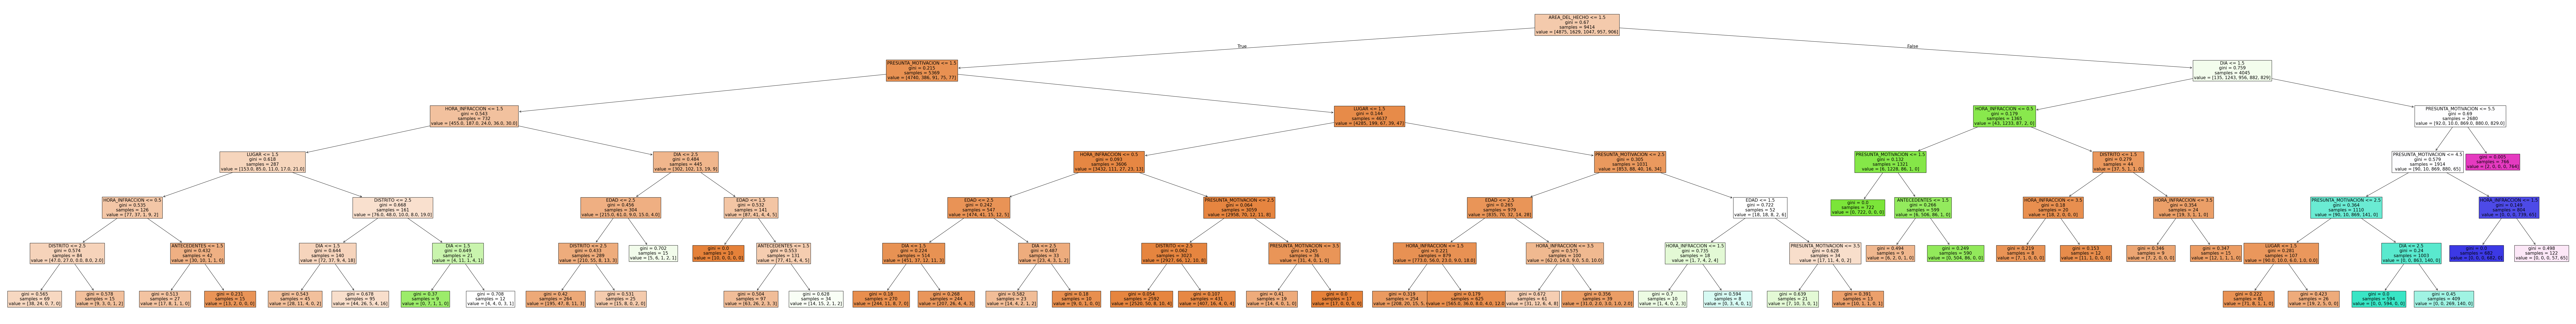

In [75]:


figura_arbol = plt.figure(figsize=(160,20)) # Le indicamos las dimensiones que queremos que tenga
plot_tree(arbol_modelo,feature_names=X.columns,filled=True, fontsize=15)
plt.show()

In [76]:


figura_arbol.savefig("arma_asesinatos.png")

In [77]:

# Resumen de las predicciones hechas por el clasificador
from sklearn import metrics
reporte = metrics.classification_report(y_test, y_pred,output_dict=True)
pre = pd.DataFrame(reporte).transpose()
print(pre)
pre.to_excel("resumen_arma.xlsx")

              precision    recall  f1-score     support
1              0.893040  0.992671  0.940224  1228.00000
2              0.879630  0.762032  0.816619   374.00000
3              0.862500  0.802326  0.831325   258.00000
4              1.000000  0.701613  0.824645   248.00000
5              0.932271  0.951220  0.941650   246.00000
accuracy       0.900170  0.900170  0.900170     0.90017
macro avg      0.913488  0.841972  0.870892  2354.00000
weighted avg   0.902931  0.900170  0.896623  2354.00000


In [78]:
from sklearn import metrics
import pandas as pd

reporte = metrics.classification_report(y_test, y_pred, output_dict=True)

# Extraer solo la precisión de cada clase, excluyendo métricas agregadas
precision = {class_name: metrics['precision'] for class_name, metrics in reporte.items() if isinstance(metrics, dict)}

# Convertir a DataFrame
precision_df = pd.DataFrame(list(precision.items()), columns=['Clase', 'Precisión'])

# Imprimir el DataFrame
print(precision_df)


          Clase  Precisión
0             1   0.893040
1             2   0.879630
2             3   0.862500
3             4   1.000000
4             5   0.932271
5     macro avg   0.913488
6  weighted avg   0.902931


In [79]:

y_test.head()

,ARMA
0,1
1,3
2,1
3,4
4,1


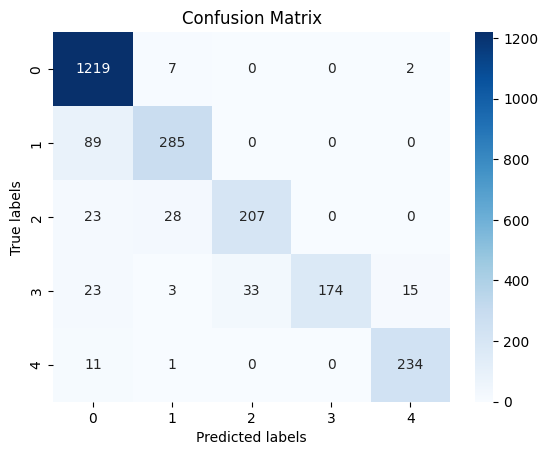

In [80]:

#Matriz de confusion
matriz=confusion_matrix(y_test, y_pred)
ax= plt.subplot()
sns.heatmap(matriz, annot=True, cmap="Blues",fmt='g');
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');

In [81]:

cm = confusion_matrix(y_test, y_pred)

mc= pd.DataFrame(cm)
print(mc)
mc.to_excel("matriz_confusion_arma.xlsx")

      0    1    2    3    4
0  1219    7    0    0    2
1    89  285    0    0    0
2    23   28  207    0    0
3    23    3   33  174   15
4    11    1    0    0  234


In [82]:

#Para concatenar variables
import pandas as pd

prediccion = pd.DataFrame(y_pred,columns=['arma_prediccion'])
original = y_test
original.reset_index(drop=True, inplace=True)
df_combined = pd.concat([prediccion,original], axis=1)
df_combined.head(10)

,arma_prediccion,ARMA
0,1,1
1,3,3
2,1,1
3,1,4
4,1,1
5,5,5
6,4,4
7,1,1
8,3,3
9,1,1


In [83]:
from sklearn import model_selection
from sklearn.metrics import make_scorer, precision_score, accuracy_score, recall_score

def v_cruzada(arbol_modelo, X_train, y_train):
    # Convertir y_train a un array unidimensional
    y_train = y_train.values.ravel()

    # Definir los scorers para precisión, accuracy y recall
    precision_scorer = make_scorer(precision_score, average='micro')
    accuracy_scorer = make_scorer(accuracy_score)  # No necesita parámetro average
    recall_scorer = make_scorer(recall_score, average='micro')

    seed = 7
    kfold = model_selection.KFold(n_splits=5, random_state=seed, shuffle=True)  # shuffle para activar el random state

    # Realiza la validación cruzada para precisión
    cv_results_precision = model_selection.cross_val_score(arbol_modelo, X_train, y_train, cv=kfold, scoring=precision_scorer)
    print("Iteraciones validación cruzada (Precisión):\n", cv_results_precision)
    msg_precision = "%f (%f)" % (cv_results_precision.mean(), cv_results_precision.std())
    print("Precisión media:\n", msg_precision)

    # Realiza la validación cruzada para accuracy
    cv_results_accuracy = model_selection.cross_val_score(arbol_modelo, X_train, y_train, cv=kfold, scoring=accuracy_scorer)
    print("Iteraciones validación cruzada (Accuracy):\n", cv_results_accuracy)
    msg_accuracy = "%f (%f)" % (cv_results_accuracy.mean(), cv_results_accuracy.std())
    print("Accuracy media:\n", msg_accuracy)

    # Realiza la validación cruzada para recall
    cv_results_recall = model_selection.cross_val_score(arbol_modelo, X_train, y_train, cv=kfold, scoring=recall_scorer)
    print("Iteraciones validación cruzada (Recall):\n", cv_results_recall)
    msg_recall = "%f (%f)" % (cv_results_recall.mean(), cv_results_recall.std())
    print("Recall media:\n", msg_recall)



In [84]:

#Validación cruzada
v_cruzada(arbol_modelo, X_train,y_train)

Iteraciones validación cruzada (Precisión):
 [0.89537971 0.90600106 0.90228359 0.8890069  0.90595112]
Precisión media:
 0.899724 (0.006610)
Iteraciones validación cruzada (Accuracy):
 [0.89537971 0.90600106 0.90228359 0.8890069  0.90595112]
Accuracy media:
 0.899724 (0.006610)
Iteraciones validación cruzada (Recall):
 [0.89537971 0.90600106 0.90175252 0.8890069  0.90595112]
Recall media:
 0.899618 (0.006572)


In [85]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

# Assuming y_pred and y_test are defined
print('Precision: ', precision_score(y_test, y_pred, average='micro') * 100)
print('Accuracy: ', accuracy_score(y_test, y_pred) * 100)
print('Recall: ', recall_score(y_test, y_pred, average='micro') * 100)

Precision:  90.01699235344095
Accuracy:  90.01699235344095
Recall:  90.01699235344095


In [86]:
df_combined['ARMA'] = df_combined['ARMA'].apply(lambda x:
                                                'Arma fuego' if x == 1 else
                                                'Arma blanca' if x == 2 else
                                                'Sustancias y otros' if x == 3 else
                                                'Arma contundente'if x == 4 else
                                                'Arma constrictora' )



In [87]:
df_combined['arma_prediccion'] = df_combined['arma_prediccion'].apply(lambda x:
                                                'Arma fuego' if x == 1 else
                                                'Arma blanca' if x == 2 else
                                                'Sustancias y otros' if x == 3 else
                                                'Arma contundente'if x == 4 else
                                                'Arma constrictora' )



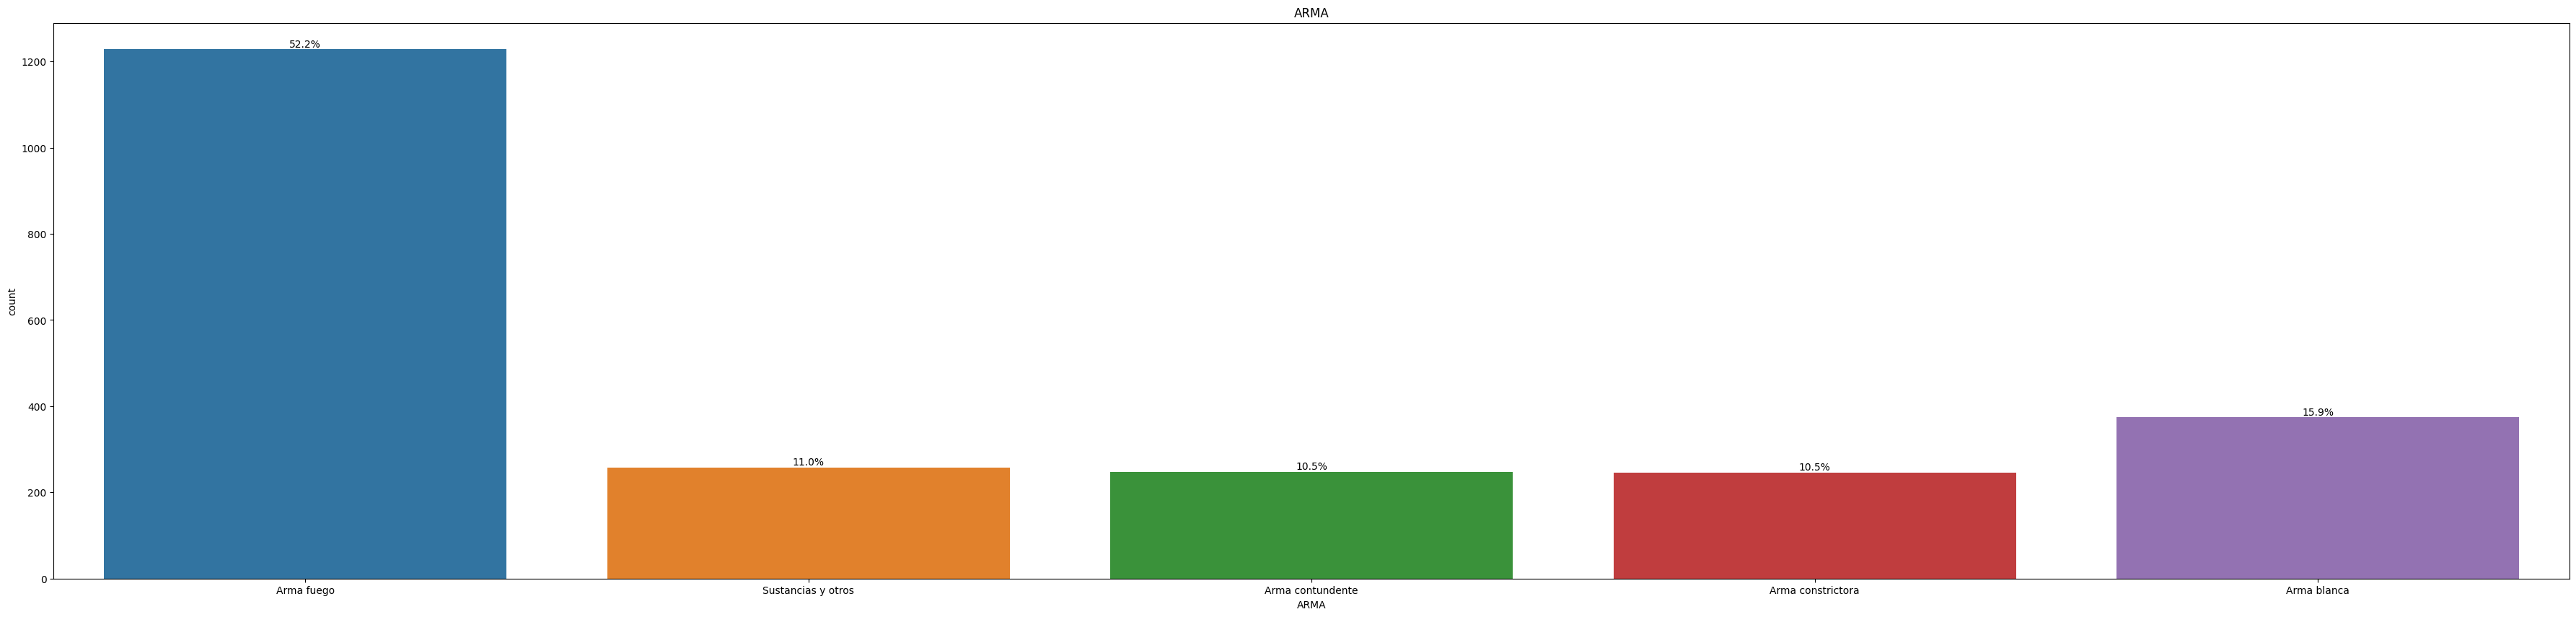

In [88]:

import seaborn as sns #permite generar fácilmente elegantes gráficos, proporciona una interfaz de alto nivel que es realmente sencilla de aprender.
ax = plt.subplots(figsize = (45,10))
ncount=len(df_combined)
sns.countplot(x='ARMA',hue = 'ARMA', data = df_combined, ax = ax[1]) #Muestre el conteo de observaciones en cada contenedor categórico usando barras.
ax[1].set_title('ARMA')

for p in ax[1].patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax[1].annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y),
            ha='center', va='bottom') # set the alignment of the text

#Guardamos la figura de barras original
ax[0].savefig("barras_original_ARMA.png")

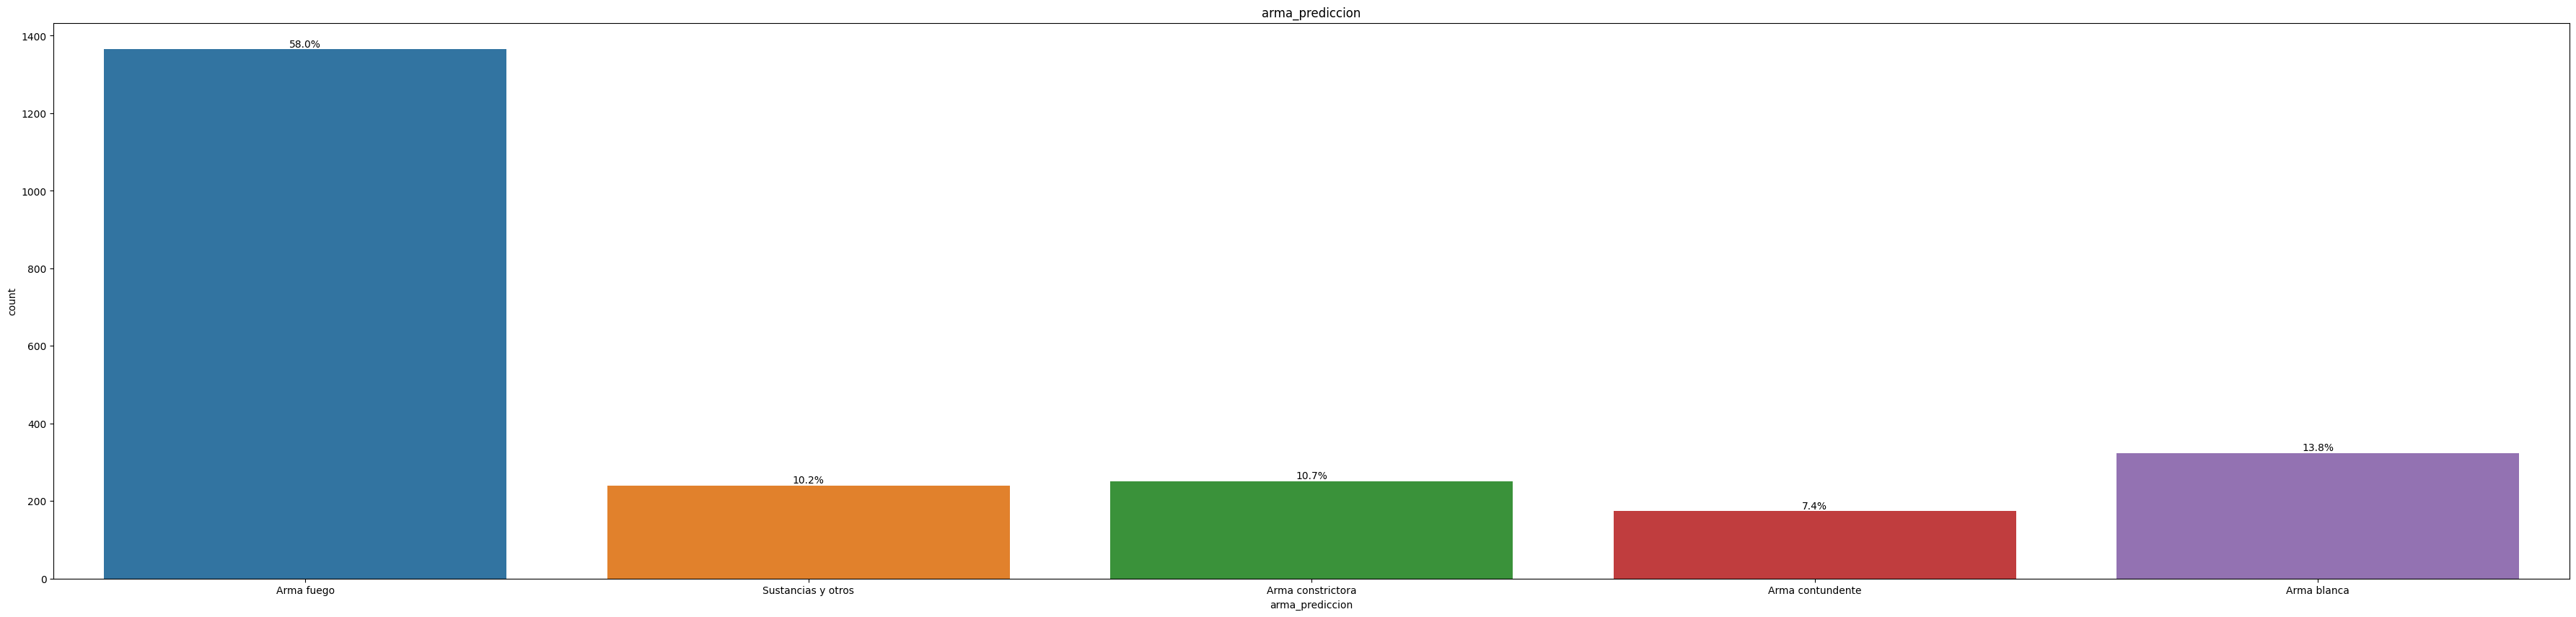

In [89]:


ax = plt.subplots(figsize = (45,10))
ncount=len(df_combined)
sns.countplot(x='arma_prediccion',hue = 'arma_prediccion', data = df_combined, ax = ax[1]) #Muestre el conteo de observaciones en cada contenedor categórico usando barras.
ax[1].set_title('arma_prediccion')


for p in ax[1].patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax[1].annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y),
            ha='center', va='bottom') # set the alignment of the text

#Guardamos la figura de barras de predicción
ax[0].savefig("barras_prediccion_arma.png")